Document Missing Values: Check for missing values and document their frequency and distribution across features

                                                   Missing Values Count  \
VIN (1-10)                                                            0   
County                                                                4   
City                                                                  4   
State                                                                 0   
Postal Code                                                           4   
Model Year                                                            0   
Make                                                                  0   
Model                                                                 0   
Electric Vehicle Type                                                 0   
Clean Alternative Fuel Vehicle (CAFV) Eligibility                     0   
Electric Range                                                

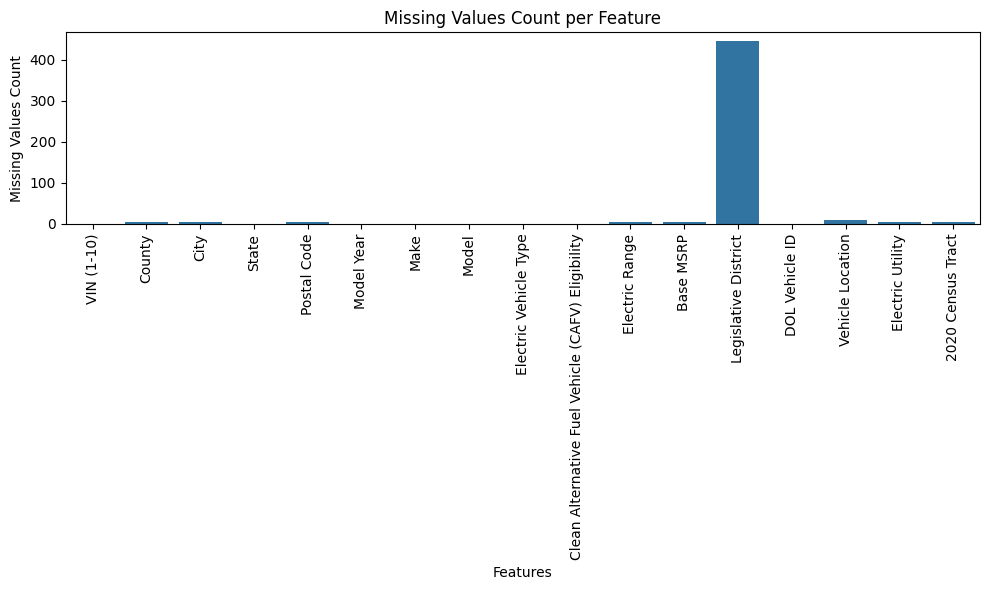

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

print("Document Missing Values: Check for missing values and document their frequency and distribution across features\n")
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("Electric_Vehicle_Population_Data.csv", na_values=missing_values)
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100
    
missing_values_table = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})
print(missing_values_table)
    
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xticks(rotation=90)
plt.title("Missing Values Count per Feature")
plt.xlabel("Features")
plt.ylabel("Missing Values Count")
plt.tight_layout()
plt.show()



Missing Value Strategies: If missing values are present, apply multiple strategies (e.g., mean/median imputation, dropping rows) and compare their impact on the analysis.

Missing Value Strategies:
Summary Statistics for Columns with Missing Values:
                              Mean       Median         Mode  \
Postal Code                 98178        98125        98052   
Electric Range                 51            0            0   
Base MSRP                     898            0            0   
Legislative District           29           32           41   
2020 Census Tract     52979294366  53033030101  53033028200   

                      Standard Deviation  
Postal Code                         2445  
Electric Range                        87  
Base MSRP                           7654  
Legislative District                  15  
2020 Census Tract             1551466456  


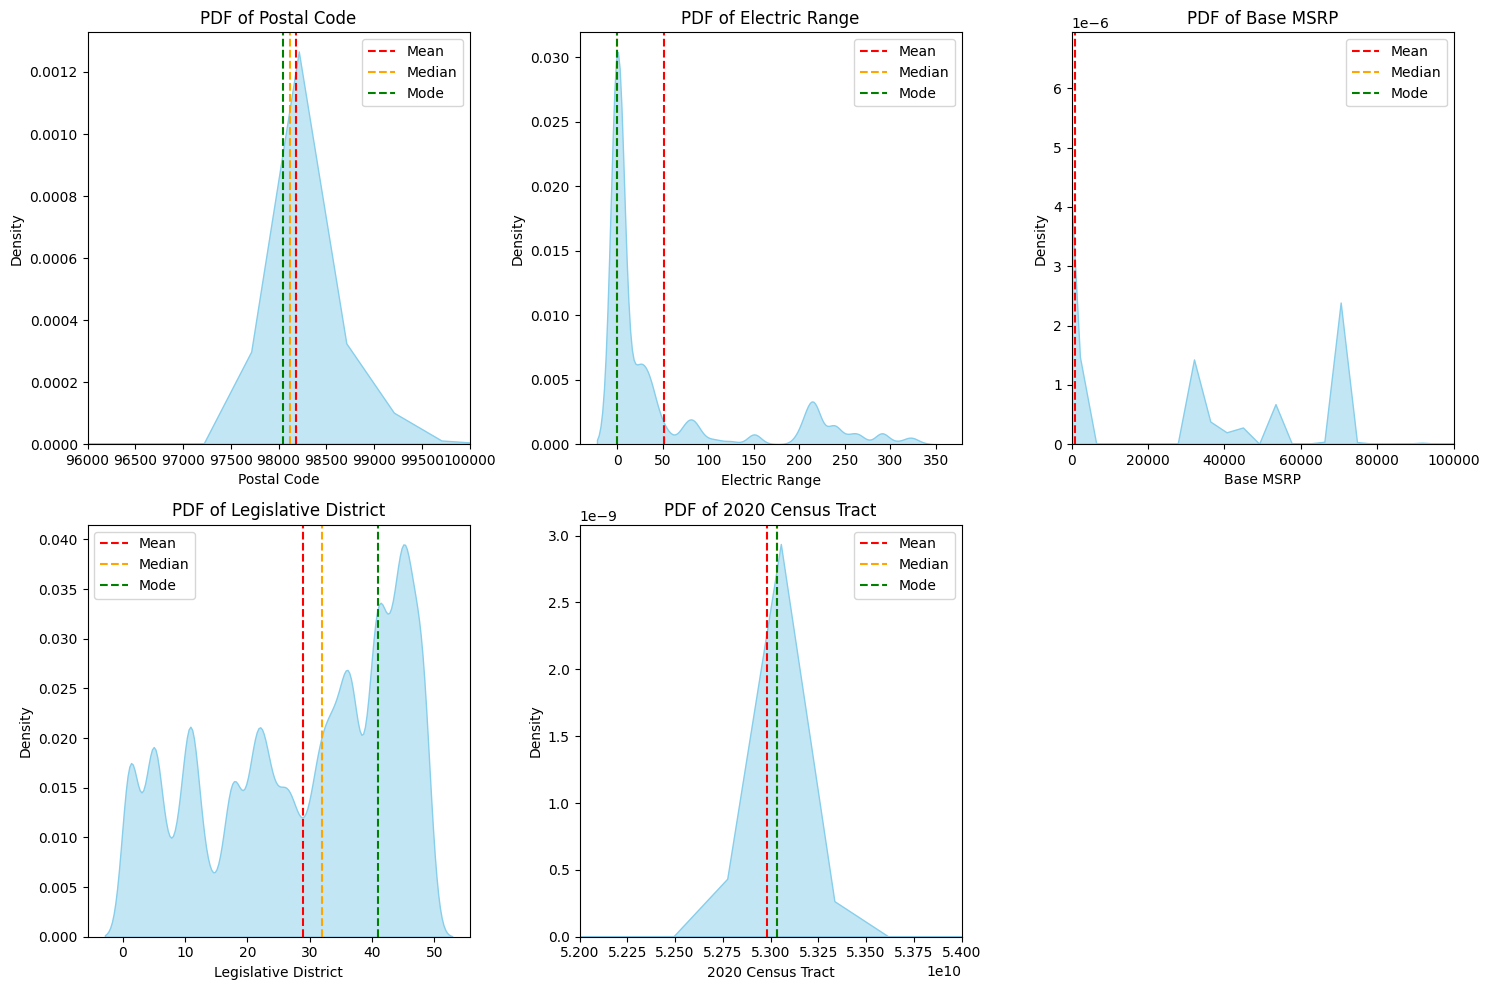

In [3]:
print("Missing Value Strategies: If missing values are present, apply multiple strategies (e.g., mean/median imputation, dropping rows) and compare their impact on the analysis.")

numerical_columns = df.select_dtypes(include='number').columns.tolist()
df_numeric = df[numerical_columns]

summary_stats = {}

for column in numerical_columns:
    if missing_values_count[column] > 0:  # Check if the column has missing values

        mean_value = df[column].mean().round().astype(int)
        median_value = df[column].median().round().astype(int)
        mode_value = df[column].mode().iloc[0].round().astype(int)
        std_dev_value = df[column].std().round().astype(int)

        summary_stats[column] = {
            'Mean': mean_value,
            'Median': median_value,
            'Mode': mode_value,
            'Standard Deviation': std_dev_value
        }

summary_stats_df = pd.DataFrame(summary_stats).T
print("\nMissing Value Strategies:")
print("Summary Statistics for Columns with Missing Values:\n", summary_stats_df)

plt.figure(figsize=(15, 10))
for i, column in enumerate(summary_stats_df.index[:6]):  # Only take the first 6 columns
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df[column], fill=True, color='skyblue', alpha=0.5)
    plt.axvline(summary_stats_df.loc[column, 'Mean'], color='red', linestyle='--', label='Mean')
    plt.axvline(summary_stats_df.loc[column, 'Median'], color='orange', linestyle='--', label='Median')
    plt.axvline(summary_stats_df.loc[column, 'Mode'], color='green', linestyle='--', label='Mode')
    plt.title(f'PDF of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    if column == 'Postal Code':
        plt.xlim(96000, 100000)
    if column == 'Base MSRP':
        plt.xlim(0, 100000)
    if column == '2020 Census Tract':
        plt.xlim(52000000000, 54000000000)

plt.tight_layout()
plt.show()


Impact of Missing Value Handling on 'County' Column:
Missing Values Before:  4
Mode Value:  King
Percentage Before:  50.96806733884974
Percentage After:  50.96900054718911
different :  0.0009332083393687185
Dropped Rows Percentage:  0.001903266481098185
______________________________


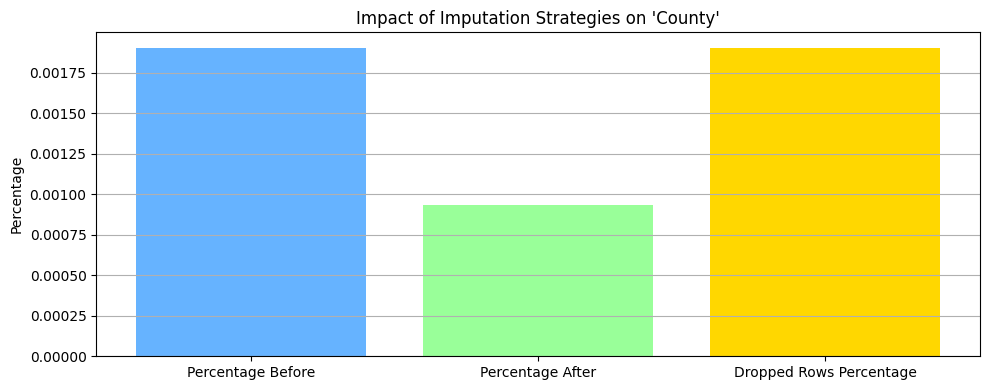

Impact of Missing Value Handling on 'City' Column:
Missing Values Before:  4
Mode Value:  Seattle
Percentage Before:  16.10860245240554
Percentage After:  16.110199129255584
different :  0.0015966768500454975
Dropped Rows Percentage:  0.001903266481098185
______________________________


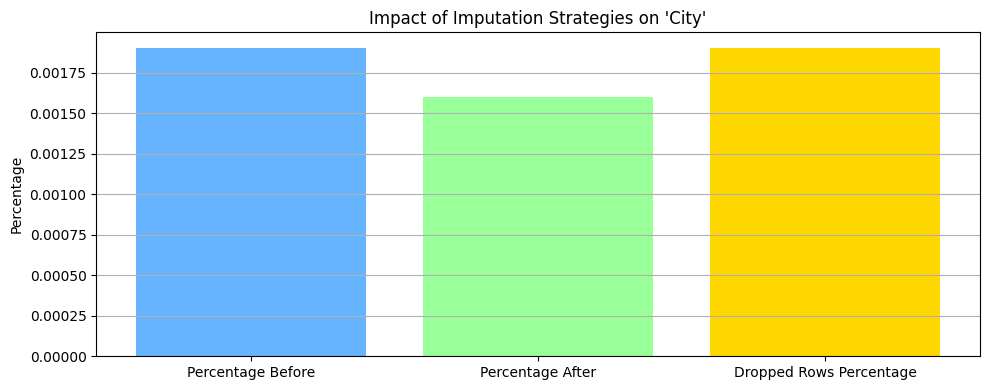

Impact of Missing Value Handling on 'Vehicle Location' Column:
Missing Values Before:  10
Mode Value:  POINT (-122.13158 47.67858)
Percentage Before:  2.501011158430682
Percentage After:  2.5056503223657605
different :  0.004639163935078461
Dropped Rows Percentage:  0.004758166202745461
______________________________


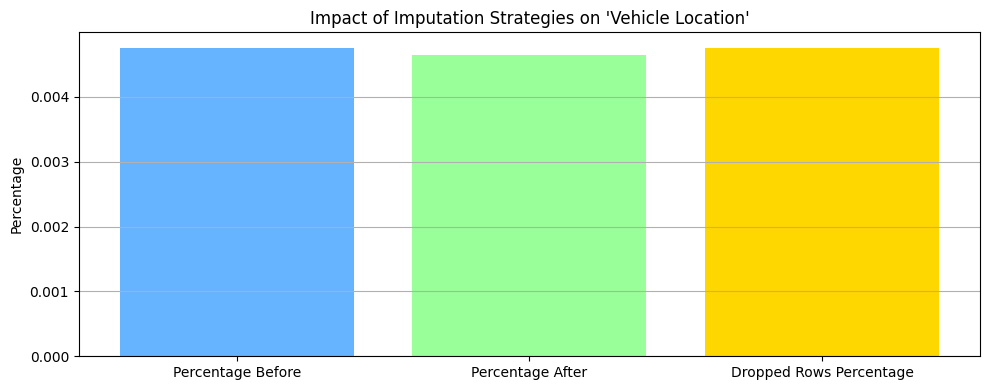

Impact of Missing Value Handling on 'Electric Utility' Column:
Missing Values Before:  4
Mode Value:  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
Percentage Before:  36.45110177435395
Percentage After:  36.45231127923299
different :  0.0012095048790357055
Dropped Rows Percentage:  0.001903266481098185
______________________________


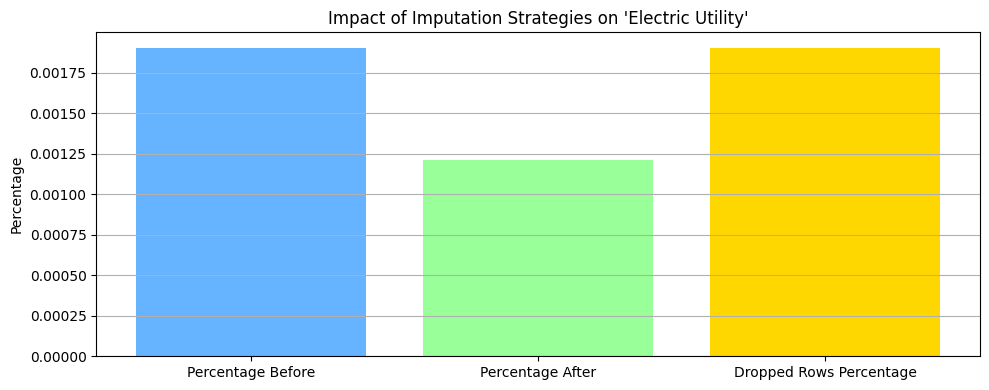

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

df_mode_imputed = df.copy()
df_placeholder_imputed = df.copy()

for column in non_numerical_columns:
    if missing_values_count[column] > 0:
        original_value_counts = df[column].value_counts(normalize=True)
        
        missing_before = df[column].isnull().sum()

        mode_value = df[column].mode()[0]
        df_mode_imputed[column] = df_mode_imputed[column].fillna(mode_value)
        mode_value_counts = df_mode_imputed[column].value_counts(normalize=True)

        df_dropped_rows = df.dropna(subset=[column])
        
        num_dropped_rows = len(df) - len(df_dropped_rows)
        dropped_rows_percentage = (num_dropped_rows / len(df)) * 100
        
        original_top_value = original_value_counts.index[0]
        original_top_percentage = original_value_counts.iloc[0] * 100
        mode_top_percentage = mode_value_counts[mode_value] * 100

        # Print results without using DataFrame
        print(f"Impact of Missing Value Handling on '{column}' Column:")
        print("Missing Values Before: ", missing_before)
        print("Mode Value: ", mode_value)
        print("Percentage Before: ", original_top_percentage)
        print("Percentage After: ", mode_top_percentage)
        print("different : ", mode_top_percentage - original_top_percentage)
        print("Dropped Rows Percentage: ", dropped_rows_percentage)
        print("______________________________")  # Separator line
        
        
        plt.figure(figsize=(10, 4))
        plt.bar(['Percentage Before', 'Percentage After', 'Dropped Rows Percentage'], 
                [(missing_before / len(df)) * 100 , mode_top_percentage-original_top_percentage, dropped_rows_percentage],
                color=['#66B3FF', '#99FF99', '#FFD700'])
        plt.title(f"Impact of Imputation Strategies on '{column}'")
        plt.ylabel('Percentage')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
        

In [27]:
print("Feature Encoding:\n Encode categorical features (e.g., Make, Model) using techniques like one-hot encoding")
categorical_columns = ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
print("Categorical Columns:", categorical_columns)
        
for column in categorical_columns:
    if column in df.columns:
        one_hot_encoded = pd.get_dummies(df[column], prefix=column, drop_first=True)
        print(f'One-Hot Encoding for {column}:\n', one_hot_encoded)
        print(f'Number of columns after encoding for {column}: {one_hot_encoded.shape[1]}')
        print("\n\n")




Feature Encoding: Encode categorical features (e.g., Make, Model) using techniques like one-hot encoding
Categorical Columns: ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
One-Hot Encoding for Make:
         Make_ALFA ROMEO  Make_AUDI  Make_AZURE DYNAMICS  Make_BENTLEY  \
0                 False      False                False         False   
1                 False      False                False         False   
2                 False      False                False         False   
3                 False      False                False         False   
4                 False      False                False         False   
...                 ...        ...                  ...           ...   
210160            False      False                False         False   
210161            False      False                False         False   
210162            False      False                False         False   




Normalization:
Max and Min Values after Capping:
Electric Range - Max: 337.0, Min: 0.0
Base MSRP - Max: 845000.0, Min: 0.0

Z-score Calculations for Electric Range and Base MSRP:
Electric Range Z-score: z = (Electric Range - 50.60) / 86.97
Base MSRP Z-score: z = (Base MSRP - 897.68) / 7653.59



   Electric Range  Base MSRP  Electric Range MinMax  Base MSRP MinMax  \
0            30.0        0.0               0.089021               0.0   
1           215.0        0.0               0.637982               0.0   
2            15.0        0.0               0.044510               0.0   
3           215.0        0.0               0.637982               0.0   
4           150.0        0.0               0.445104               0.0   

   Electric Range ZScore  Base MSRP ZScore  
0              -0.236880         -0.117288  
1               1.890211         -0.117288  
2              -0.409347         -0.117288  
3               1.890211         -0.117288  
4               1.142855         -0.1

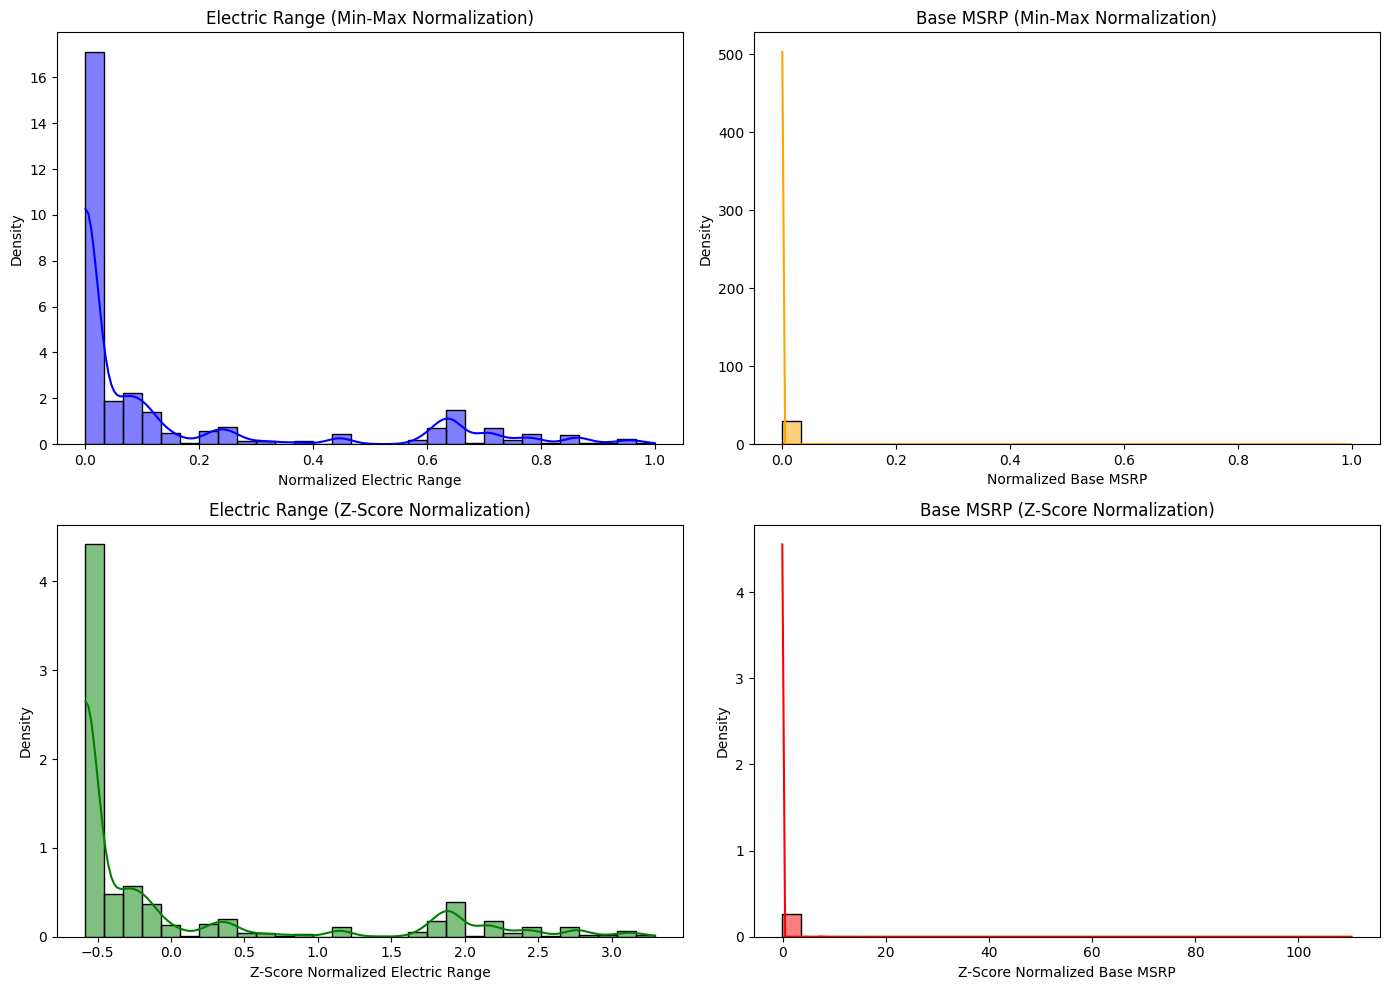

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n\nNormalization:")
# Print max and min values
print("Max and Min Values after Capping:")
print(f"Electric Range - Max: {df['Electric Range'].max()}, Min: {df['Electric Range'].min()}")
print(f"Base MSRP - Max: {df['Base MSRP'].max()}, Min: {df['Base MSRP'].min()}")

df['Electric Range MinMax'] = (df['Electric Range'] - df['Electric Range'].min()) / (df['Electric Range'].max() - df['Electric Range'].min())
df['Base MSRP MinMax'] = (df['Base MSRP'] - df['Base MSRP'].min()) / (df['Base MSRP'].max() - df['Base MSRP'].min())

def z_score(column):
    return (column - column.mean()) / column.std()

# Apply the Z-Score function
df['Electric Range ZScore'] = z_score(df['Electric Range'])
df['Base MSRP ZScore'] = z_score(df['Base MSRP'])

print("\nZ-score Calculations for Electric Range and Base MSRP:")
print(f"Electric Range Z-score: z = (Electric Range - {df['Electric Range'].mean():.2f}) / {df['Electric Range'].std():.2f}")
print(f"Base MSRP Z-score: z = (Base MSRP - {df['Base MSRP'].mean():.2f}) / {df['Base MSRP'].std():.2f}")
print("\n\n")
print(df[['Electric Range', 'Base MSRP', 'Electric Range MinMax', 'Base MSRP MinMax', 'Electric Range ZScore', 'Base MSRP ZScore']].head())

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Electric Range MinMax'], bins=30, kde=True, color='blue', stat="density")
plt.title('Electric Range (Min-Max Normalization)')
plt.xlabel('Normalized Electric Range')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
sns.histplot(df['Base MSRP MinMax'], bins=30, kde=True, color='orange', stat="density")
plt.title('Base MSRP (Min-Max Normalization)')
plt.xlabel('Normalized Base MSRP')
plt.ylabel('Density')

# Z-Score Normalization plots
plt.subplot(2, 2, 3)
sns.histplot(df['Electric Range ZScore'], bins=30, kde=True, color='green', stat="density")
plt.title('Electric Range (Z-Score Normalization)')
plt.xlabel('Z-Score Normalized Electric Range')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.histplot(df['Base MSRP ZScore'], bins=30, kde=True, color='red', stat="density")
plt.title('Base MSRP (Z-Score Normalization)')
plt.xlabel('Z-Score Normalized Base MSRP')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [14]:
import folium
from folium.plugins import HeatMap

print("\n\nSpatial Distribution:")
df['Latitude'] = df['Vehicle Location'].apply(lambda x: float(x.split()[2].strip(')')) if isinstance(x, str) else None)
df['Longitude'] = df['Vehicle Location'].apply(lambda x: float(x.split()[1].strip('(')) if isinstance(x, str) else None)


m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
heat_data = [[row['Latitude'], row['Longitude']] for _, row in df.iterrows() if pd.notna(row['Latitude']) and pd.notna(row['Longitude'])]
HeatMap(heat_data).add_to(m)

m.save('ev_location_map.html')
m



Spatial Distribution:


              Model  Count
0           MODEL Y  44038
1           MODEL 3  32520
2              LEAF  13606
3           MODEL S   7795
4           BOLT EV   6780
..              ...    ...
148            750E      2
149         SPECTRE      2
150  PROMASTER 3500      2
151             918      1
152            VF 8      1

[153 rows x 2 columns]


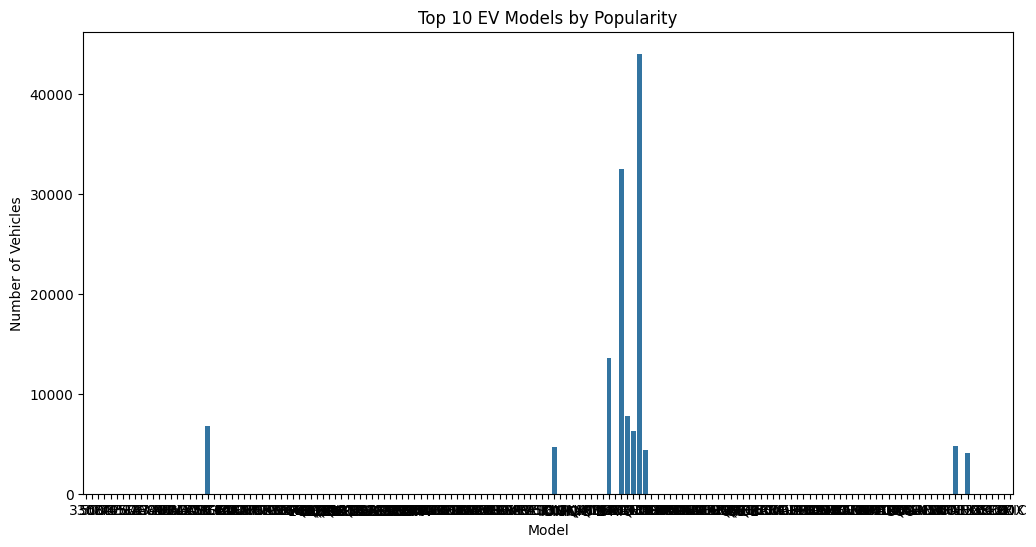

<Figure size 1400x700 with 0 Axes>

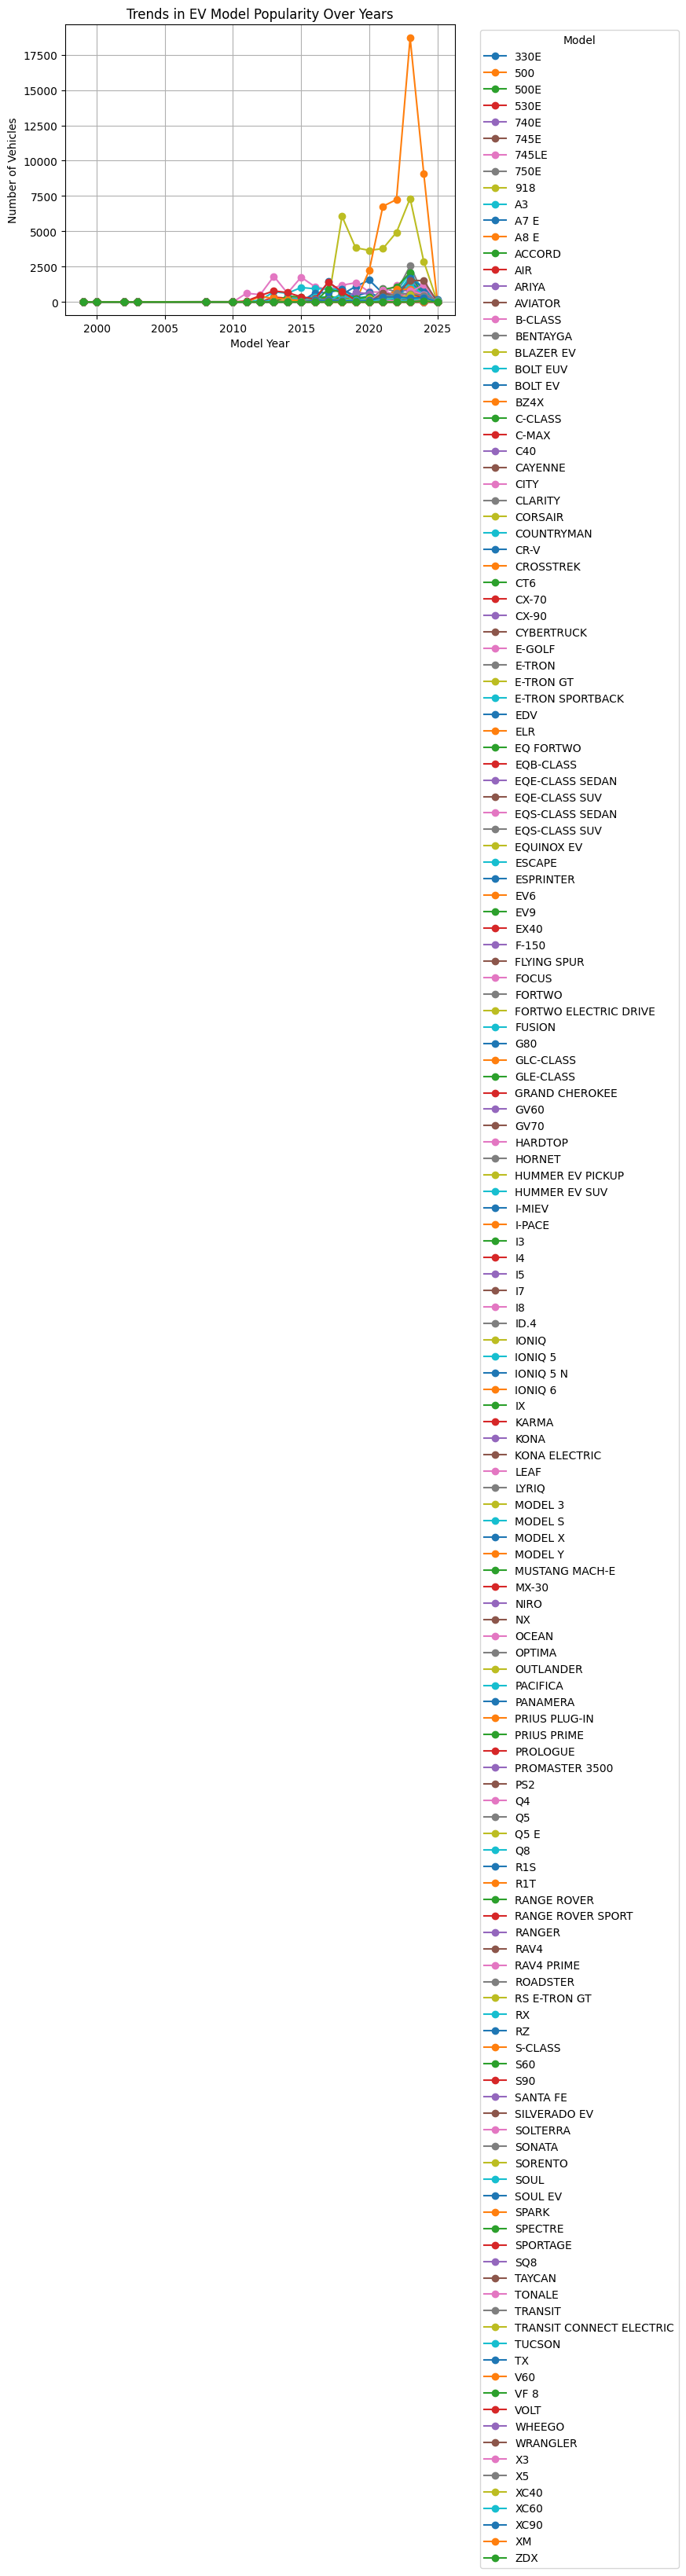

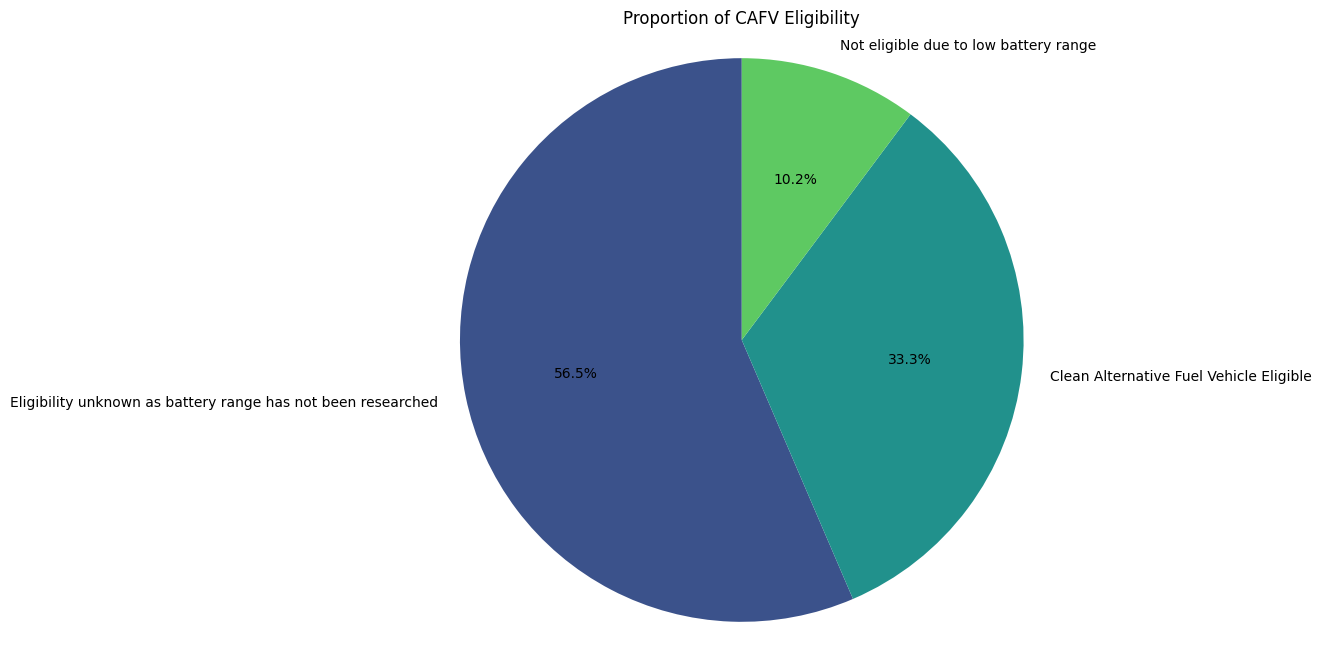

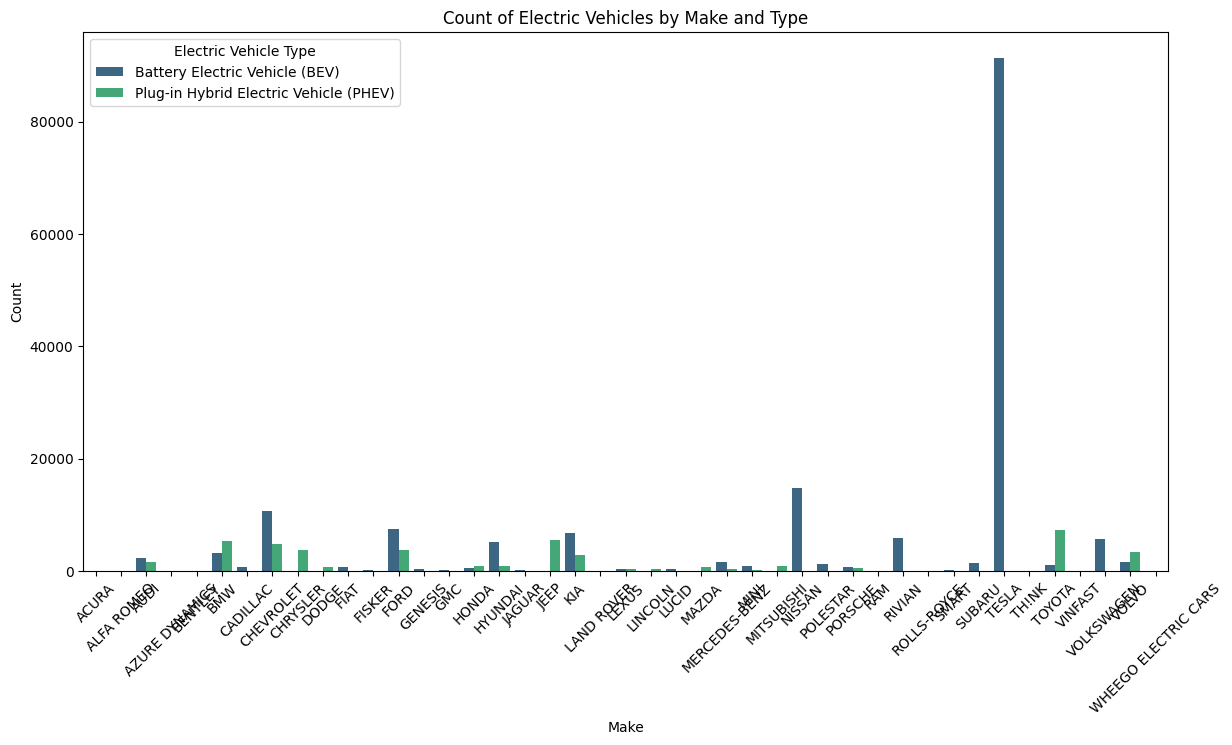

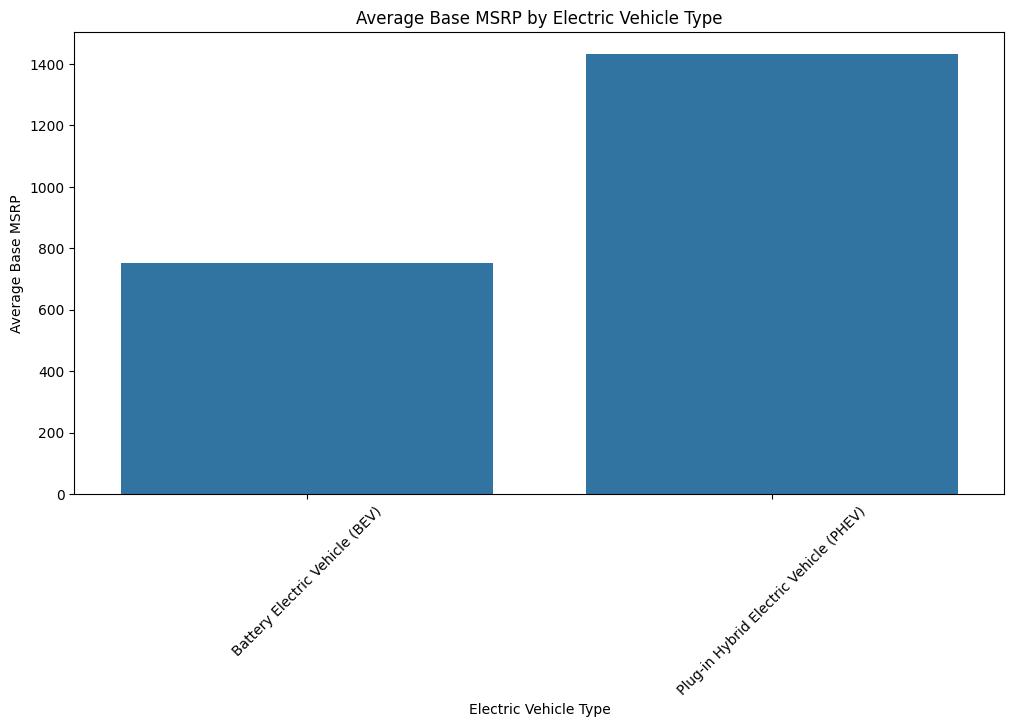

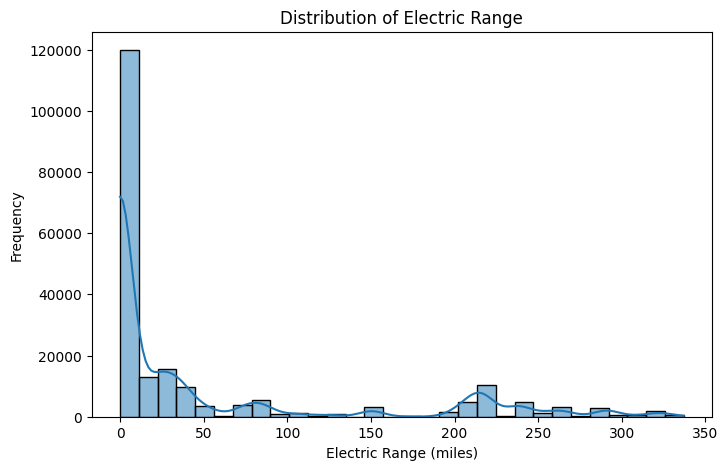

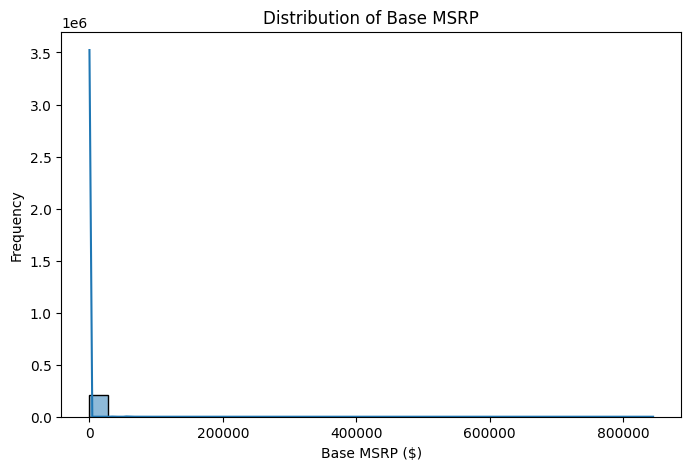

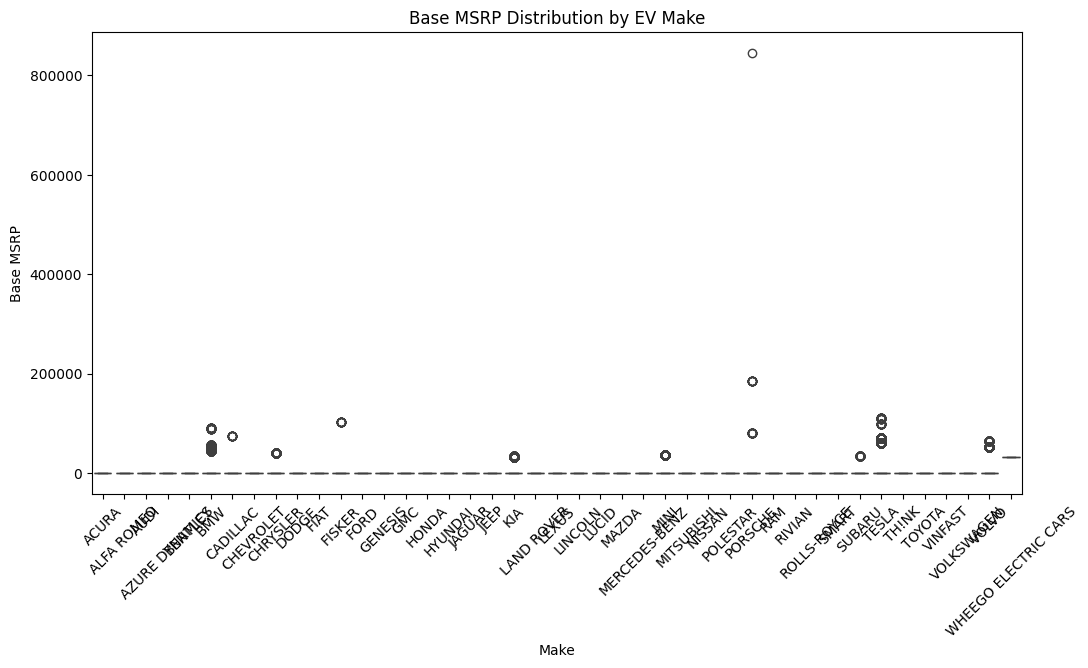

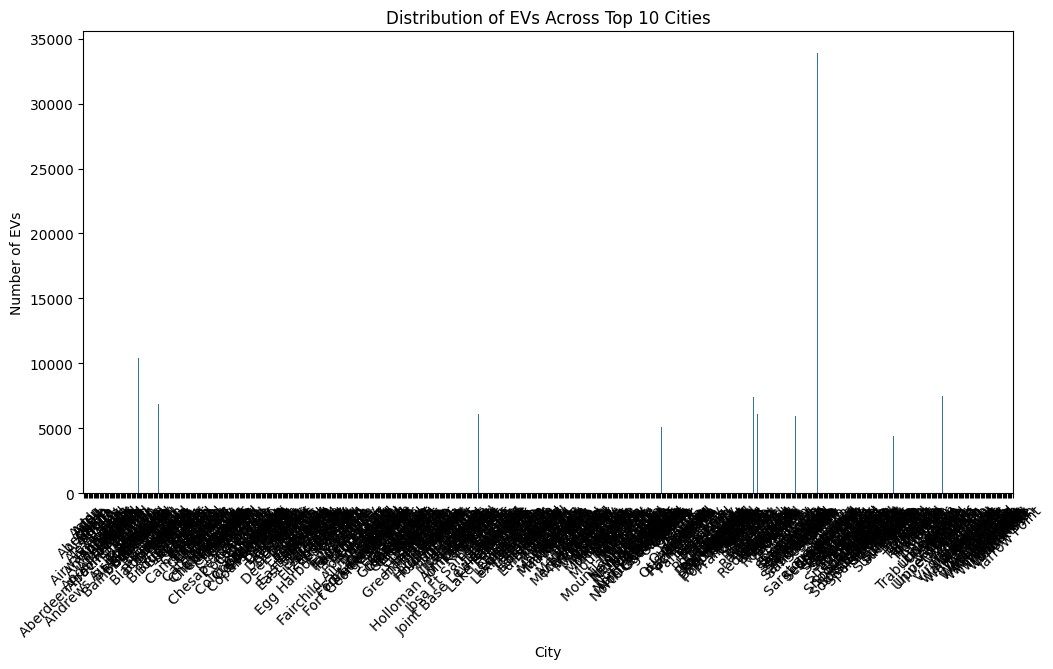

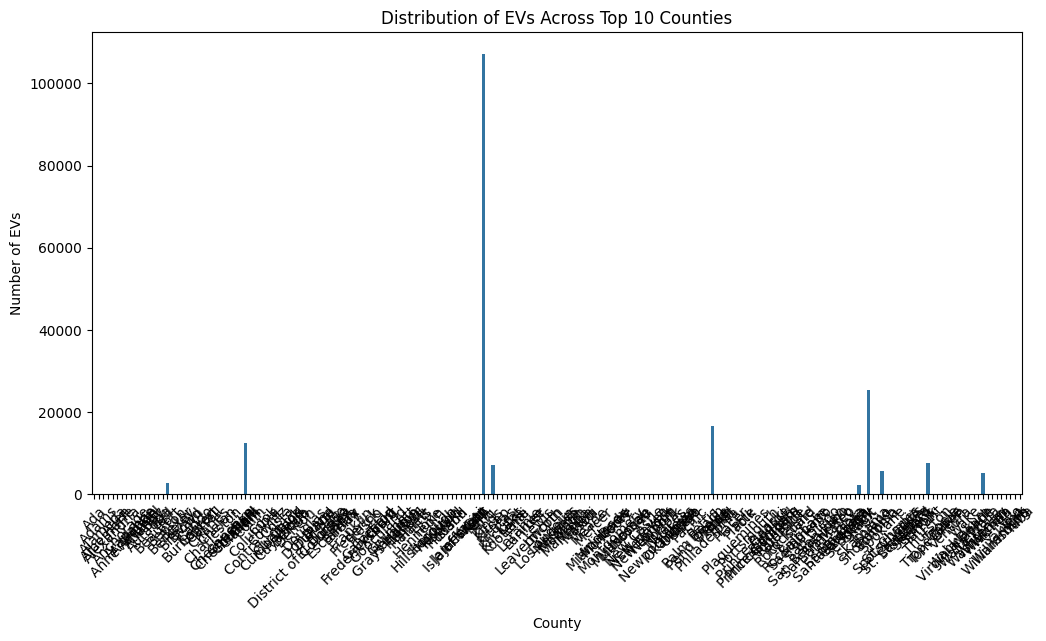

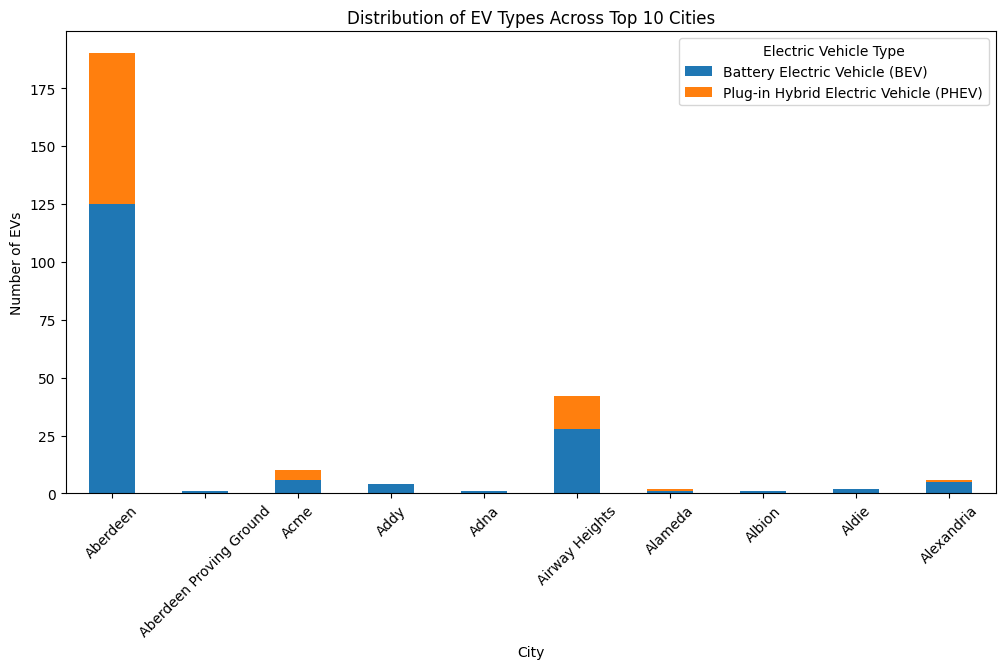

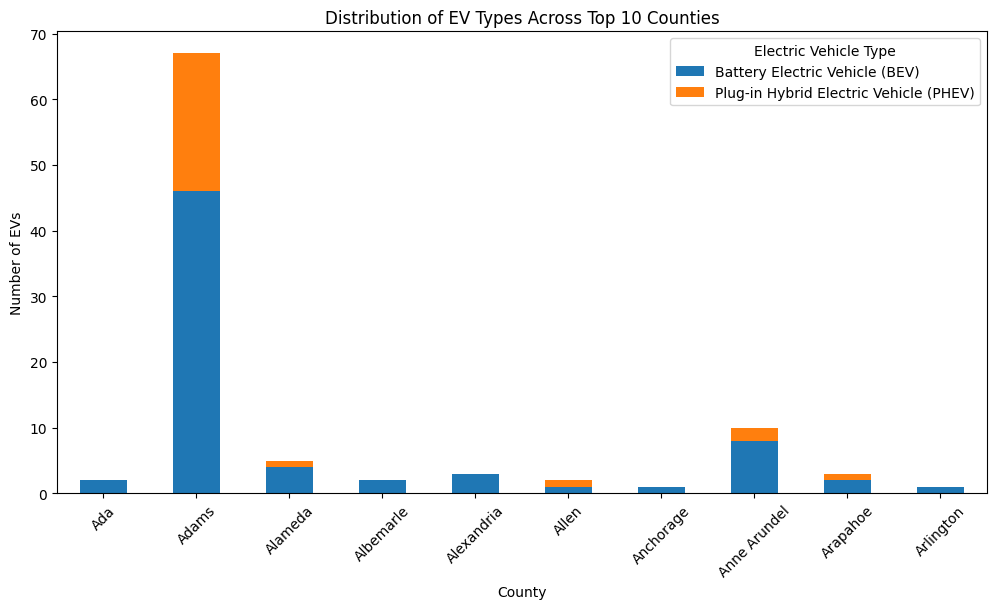

In [4]:


# Load the data from a CSV file (replace 'your_file.csv' with your actual file path)
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Convert categorical fields to category dtype
categorical_cols = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
for col in categorical_cols:
    df[col] = df[col].astype('category')
# Count the number of occurrences of each model
model_popularity = df['Model'].value_counts().reset_index()
model_popularity.columns = ['Model', 'Count']

# Display the popularity data
print(model_popularity)


# Set up the matplotlib figure
plt.figure(figsize=(12, 6))
# Create a bar plot for model popularity
sns.barplot(data=model_popularity.head(10), x='Model', y='Count')     # Top 10 models
plt.title('Top 10 EV Models by Popularity')
plt.ylabel('Number of Vehicles')
plt.xlabel('Model')
plt.show()
# Count vehicles per model year
year_trends = df.groupby(['Model Year', 'Model'], observed=True).size().unstack(fill_value=0)

# Plot trends over years
plt.figure(figsize=(14, 7))
year_trends.plot(kind='line', marker='o')
plt.title('Trends in EV Model Popularity Over Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Pie chart for Clean Alternative Fuel Vehicle (CAFV) Eligibility
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cafv_counts, labels=cafv_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(cafv_counts)))
plt.title('Proportion of CAFV Eligibility')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

# Grouped bar plot for EV counts by Make and Electric Vehicle Type
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Make', hue='Electric Vehicle Type', palette='viridis')
plt.title('Count of Electric Vehicles by Make and Type')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()


# Bar plot for average Base MSRP by Electric Vehicle Type
avg_msrp_by_type = df.groupby('Electric Vehicle Type', observed=True)['Base MSRP'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_msrp_by_type, x='Electric Vehicle Type', y='Base MSRP')
plt.title('Average Base MSRP by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Base MSRP')
plt.xticks(rotation=45)
plt.show()


# Electric Range Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

# Base MSRP Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Base MSRP'], bins=30, kde=True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')
plt.show()

# Box plot for Base MSRP by Make
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='Base MSRP')
plt.title('Base MSRP Distribution by EV Make')
plt.xlabel('Make')
plt.ylabel('Base MSRP')
plt.xticks(rotation=45)
plt.show()

# Bar chart for number of EVs in each city
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts().head(10)  # Show top 10 cities
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Distribution of EVs Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()


# Bar chart for number of EVs in each county
plt.figure(figsize=(12, 6))
county_counts = df['County'].value_counts().head(10)  # Show top 10 counties
sns.barplot(x=county_counts.index, y=county_counts.values)
plt.title('Distribution of EVs Across Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()


# Pivot table for stacking Electric Vehicle Type by City
city_ev_type = df.pivot_table(index='City', columns='Electric Vehicle Type', aggfunc='size', fill_value=0, observed=False).head(10)

# Stacked bar chart
city_ev_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of EV Types Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()


# Pivot table for stacking Electric Vehicle Type by County
county_ev_type = df.pivot_table(index='County', columns='Electric Vehicle Type', aggfunc='size', fill_value=0, observed=False).head(10)

# Stacked bar chart
county_ev_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of EV Types Across Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()




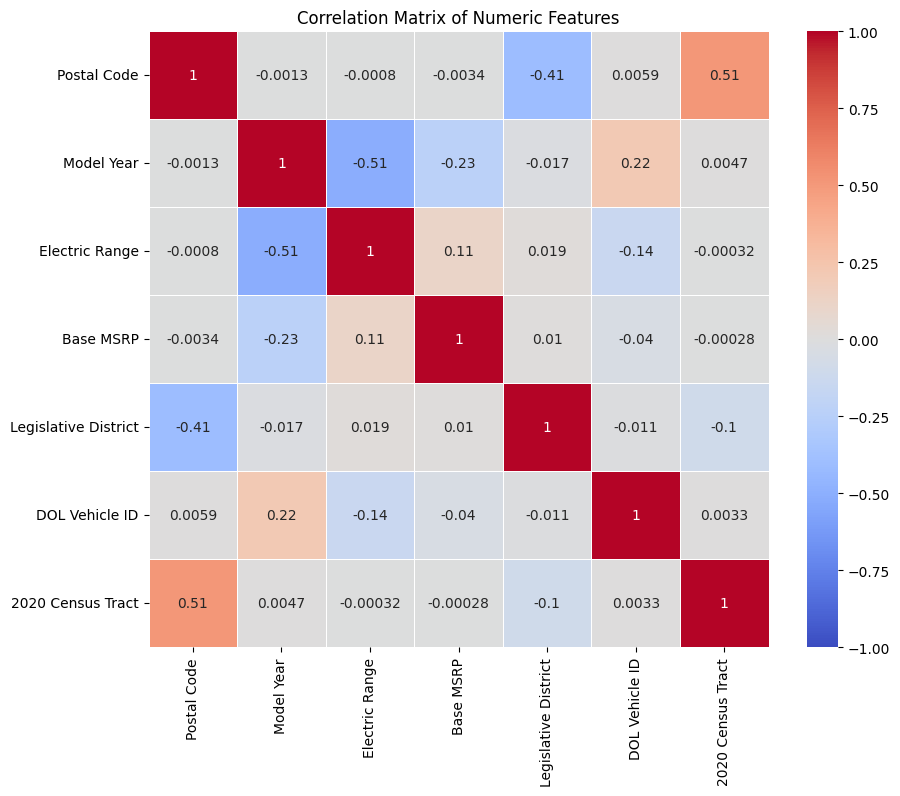

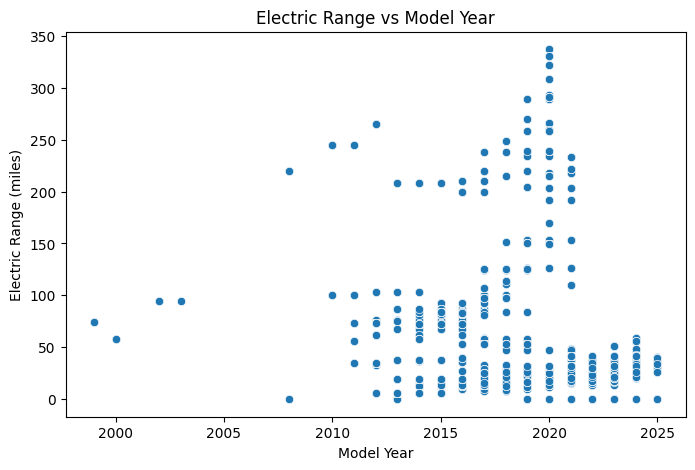

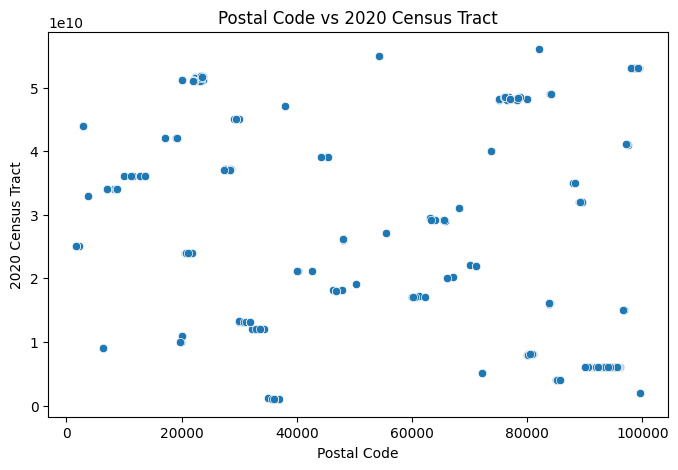

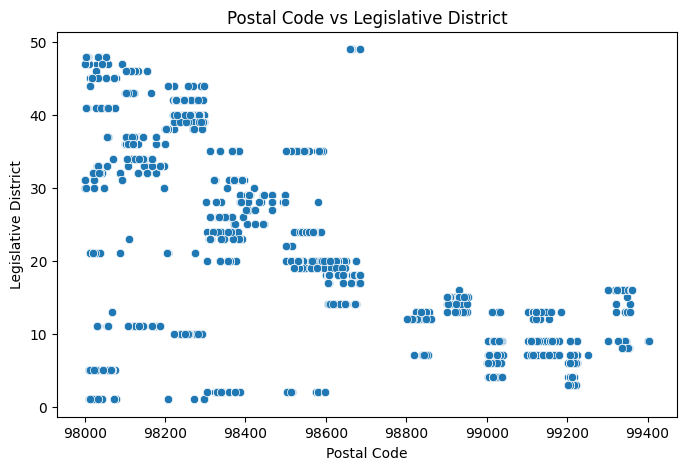

"\n# Scatter plot between 'Electric Range' and 'Base MSRP'\nplt.figure(figsize=(8, 5))\nsns.scatterplot(x='Base MSRP', y='Electric Range', data=df)\nplt.title('Electric Range vs Base MSRP')\nplt.xlabel('Base MSRP ($)')\nplt.ylabel('Electric Range (miles)')\nplt.show()\n\n# Scatter plot between 'Model Year' and 'Base MSRP'\nplt.figure(figsize=(8, 5))\nsns.scatterplot(x='Base MSRP', y='Model Year', data=df)\nplt.title('Model Year vs Base MSRP')\nplt.xlabel('Base MSRP ($)')\nplt.ylabel('Model Year')\nplt.show()\n"

In [3]:


##correlation

# Select only numeric features from the dataset
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# Scatter plot between 'Electric Range' and 'Model Year'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Model Year', y='Electric Range', data=df)
plt.title('Electric Range vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()

# Scatter plot between 'Postal Code' and '2020 Census Tract'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Postal Code', y='2020 Census Tract', data=df)
plt.title('Postal Code vs 2020 Census Tract')
plt.xlabel('Postal Code')
plt.ylabel('2020 Census Tract')
plt.show()

# Scatter plot between 'Postal Code' and 'Legislative District'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Postal Code', y='Legislative District', data=df)
plt.title('Postal Code vs Legislative District')
plt.xlabel('Postal Code')
plt.ylabel('Legislative District')
plt.show()

'''
# Scatter plot between 'Electric Range' and 'Base MSRP'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.show()

# Scatter plot between 'Model Year' and 'Base MSRP'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Base MSRP', y='Model Year', data=df)
plt.title('Model Year vs Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Model Year')
plt.show()
'''

